> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import csv 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
1- Load data
2- general info 
3- overview
4- Identify problems 
### General Properties

In [24]:
# Load data
mdf = pd.read_csv('tmdb-movies.csv')
mdf.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [25]:
# general info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [26]:
# overview
mdf.shape

(10866, 21)

In [6]:
mdf.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning 

1- keep columns that are needed for analysis
2- dropping of duplicates
3- create variable "PROFIT"
4- convert the data type from string to datetime for column (release date)
5- eliminate empty values

In [27]:
#dropping the columns not needed for analysis
mdf.drop(['id','imdb_id','budget','revenue','homepage','director','tagline','keywords','overview','production_companies','vote_count','vote_average'], axis = 1, inplace = True)

In [28]:
#Checking
mdf.head()

,popularity,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [29]:
#dropping the duplicate values
mdf.drop_duplicates(inplace=True)

In [30]:
#Checking
mdf.duplicated().sum()

0

In [31]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   cast            10789 non-null  object 
 3   runtime         10865 non-null  int64  
 4   genres          10842 non-null  object 
 5   release_date    10865 non-null  object 
 6   release_year    10865 non-null  int64  
 7   budget_adj      10865 non-null  float64
 8   revenue_adj     10865 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 848.8+ KB


In [32]:
#convert the data type from string to datetime for column (release date) 
mdf['release_date'] = pd.to_datetime(mdf['release_date'])

In [33]:
# for convert data type
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   original_title  10865 non-null  object        
 2   cast            10789 non-null  object        
 3   runtime         10865 non-null  int64         
 4   genres          10842 non-null  object        
 5   release_date    10865 non-null  datetime64[ns]
 6   release_year    10865 non-null  int64         
 7   budget_adj      10865 non-null  float64       
 8   revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 848.8+ KB


In [34]:
#eliminate empty values
mdf.dropna(subset=['genres'], inplace=True)

In [35]:
# replacing (0) values with (NaA) and drop it
mdf = mdf.replace(0,np.NaN)
mdf = mdf.dropna()

In [36]:
mdf[['popularity','runtime','budget_adj', 'revenue_adj']] = mdf[['popularity','runtime','budget_adj', 'revenue_adj']].applymap(np.int64)

In [37]:
#create variable "PROFIT"
# PROFIT = revenue - budget_adj
mdf.insert(9,'PROFIT',mdf['revenue_adj']- mdf['budget_adj'])

In [38]:
#create new column "the_main_actor" through extract the main actor from cast column
mdf['the_main_actor'] = mdf.cast.apply(lambda x: x.split('|')[0])

In [39]:
# Checking for new columns ( PROFIT, the_main_actor)
mdf.head()

,popularity,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj,PROFIT,the_main_actor
0,32,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892,1254445953,Chris Pratt
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292,210161353,Tom Hardy
2,13,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101199955,271619025,170419070,Shailene Woodley
3,11,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,183999919,1902723129,1718723210,Harrison Ford
4,9,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,174799923,1385748801,1210948878,Vin Diesel


In [40]:
# Checking 
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3850 non-null   int64         
 1   original_title  3850 non-null   object        
 2   cast            3850 non-null   object        
 3   runtime         3850 non-null   int64         
 4   genres          3850 non-null   object        
 5   release_date    3850 non-null   datetime64[ns]
 6   release_year    3850 non-null   int64         
 7   budget_adj      3850 non-null   int64         
 8   revenue_adj     3850 non-null   int64         
 9   PROFIT          3850 non-null   int64         
 10  the_main_actor  3850 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 360.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

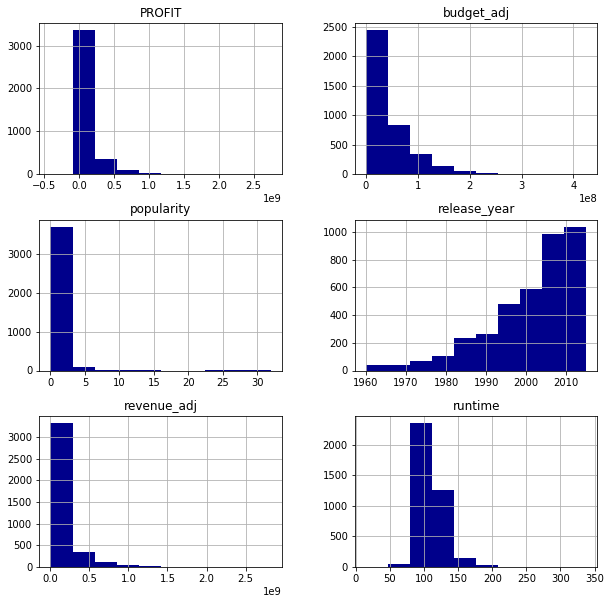

In [41]:
# to get idea of how variables are distributed
mdf.hist(color='DarkBlue',figsize= (10,10));

In [43]:
#get movies with highest popularity
mdf.nlargest(3, 'popularity')

,popularity,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj,PROFIT,the_main_actor
0,32,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892,1254445953,Chris Pratt
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292,210161353,Tom Hardy
629,24,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,169,Adventure|Drama|Science Fiction,2014-11-05,2014,151980023,572690645,420710622,Matthew McConaughey


In [44]:
#get movies with highest profit and at least > 50000000
high_profits = ['original_title', 'cast', 'genres', 'budget_adj', 'revenue_adj', 'runtime']
profit_mdf = mdf.query('PROFIT > 50000000')[high_profits]

In [45]:
def counting(column):
    # /////////////
    data = profit_mdf[column].str.cat(sep = '|')
    
    # ////////////
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    #////////////
    return count

In [46]:
# list of  movies genres
mdf['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

In [47]:
#get top 5 values
count = counting('genres')
count.head()

Drama        579
Comedy       554
Action       515
Thriller     462
Adventure    418
dtype: int64

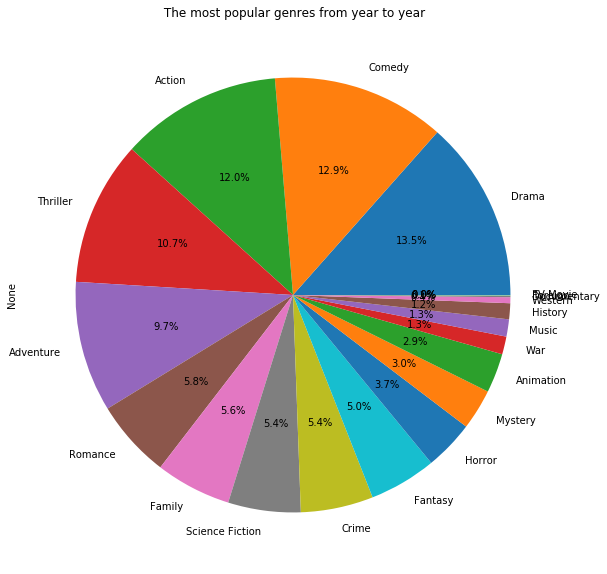

In [48]:
count.plot(kind='pie', figsize = (10, 10), autopct='%1.1f%%',fontsize=10)
ax = plt.gca()
ax.set_title(" The most popular genres from year to year");

### Research Question 2  (What kinds of properties are associated withmovies that have high revenues?)

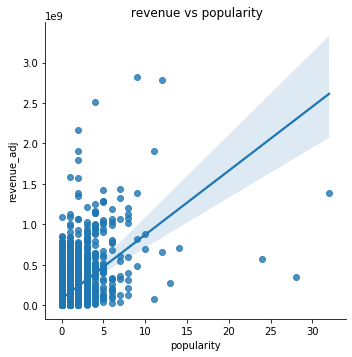

In [49]:
#most high popularity associated with high revenue
sns.lmplot(x = 'popularity', y = 'revenue_adj', data = mdf)
ax = plt.gca()
ax.set_title(" revenue vs popularity");

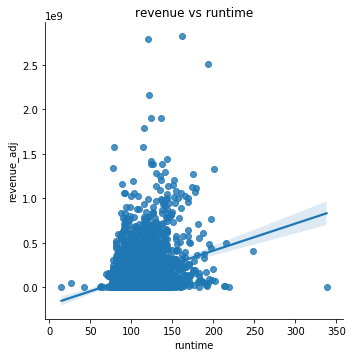

In [50]:
#runtime is an important factor in increasing revenue 
#Runtime between 120 and 180  are most profitable
sns.lmplot(x='runtime', y='revenue_adj', data=mdf)
ax = plt.gca()
ax.set_title("revenue vs runtime");


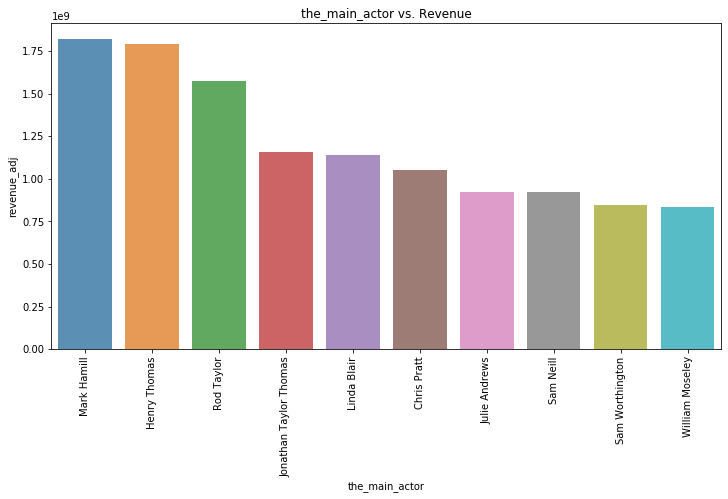

In [51]:
#main actors contribute to higher revenue
main_rev = mdf.groupby(['the_main_actor'])['revenue_adj'].sum() / mdf.groupby(['the_main_actor'])['revenue_adj'].count()
main_rev = main_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
ax = sns.barplot(main_rev.index,main_rev.tolist(), alpha = 0.8)
ax.set_title('the_main_actor vs. Revenue')
ax.set_ylabel('revenue_adj');

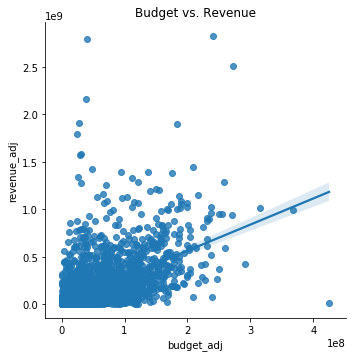

In [52]:
# most high budgets associated with high revenue
sns.lmplot(x='budget_adj', y='revenue_adj', data=mdf)
ax = plt.gca()
ax.set_title("Budget vs. Revenue");

<a id='conclusions'></a>
## Conclusions and limitations

Conclusions:
After analyzing the data that I did, it became clear to me several factors that help the success of the movie. 
The first factor you should have a budget of 200 - 300 million US dollars 
The second factor you should have a run time from 110 to 170, and the best is 120. 
The third factor you should have genre of movie of Drama, Comedy or Action

limitations:
the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. 
Dropping the rows with missing values also affected the overall analysis.